In [20]:
# -*- coding: utf-8 -*-
## Exemplo de Criação de um modelo de Previsão/Classificação usando as Arvores de Decisão

## import
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, export_graphviz
from sklearn import metrics

## carregar o ficheiro resultados para um dataframe do pandas dResult
## load the Insol file into a pandas dResult dataframe
dResult = pd.read_csv('../files/t1_win_NullCorretion.csv')



dResult.head(2)     #Mostra as primeiras n linhas do conjunto de dados
dResult.tail(5)     #Mostra as últimas n linhas do conjunto de dados


,t1_all_total5_fl_match_win,t1_all_total5_fl_match_draw,t1_all_total5_fl_match_lost,t1_all_total10_fl_match_win,t1_all_total10_fl_match_draw,t1_all_total10_fl_match_lost,t2_all_total5_fl_match_win,t2_all_total5_fl_match_draw,t2_all_total5_fl_match_lost,t2_all_total10_fl_match_win,...,t2_away_total10_fl_match_win,t2_away_total10_fl_match_draw,t2_away_total10_fl_match_lost,t1_h2h_total5_fl_match_win,t1_h2h_total5_fl_match_draw,t1_h2h_total5_fl_match_lost,t1_h2h_total10_fl_match_win,t1_h2h_total10_fl_match_draw,t1_h2h_total10_fl_match_lost,t1_fl_match_win
44085,0,2,3,1,5,4,3,1,1,6,...,6,1,2,1,0,4,2,0,8,0
44086,2,1,2,5,2,3,1,1,3,2,...,1,3,4,3,0,2,5,1,4,0
44087,1,2,2,3,3,4,2,1,2,4,...,1,3,2,0,0,0,0,0,0,0
44088,1,2,2,2,3,5,2,3,0,2,...,3,3,1,0,1,1,0,1,1,0
44089,1,1,3,2,1,7,2,0,3,5,...,4,1,4,0,0,1,0,0,1,0


In [21]:
## Pre-processamento dividir os dados em conjunto de Treino e Teste
## Pre-processing split data into Training and Test sets
x = dResult.drop('t1_fl_match_win', axis=1)   #Todas as tabelas que são usadas para fazer a predict
y = dResult.t1_fl_match_win                   #Resultados entre 1 e 0 Vitoria ou não Vitoria)


In [43]:
def modelDecisionTreeClassifier():
    DecisionTree_Class_Model = DecisionTreeClassifier()
    DecisionTree_Class_Model.fit(x_train, y_train)
      ##Previsao/Forecasting
    y_pred = DecisionTree_Class_Model.predict(x_teste)
    y_pred

##Accuracy Score
    accuracy = [metrics.accuracy_score(y_teste, y_pred),metrics.f1_score(y_teste, y_pred),metrics.recall_score(y_teste, y_pred),metrics.precision_score(y_teste, y_pred),metrics.mean_squared_error(y_teste, y_pred)]
    #f1 = metrics.f1_score(y_teste, y_pred)
    #rs = metrics.recall_score(y_teste, y_pred)
    #ps = metrics.precision_score(y_teste, y_pred)
    #mse = metrics.mean_squared_error(y_teste, y_pred)
    global y_pred_cm
    y_pred_cm = y_pred
    print ("\nResultados do modelo Decision Tree Classifier")
    print('Test size {:.2f}'.format(a))
    print("Metrics : ", accuracy)
    #rfc_fit = accuracy['estimator']
    #rfc_fit = rfc_fit[0]
    #filename = 'modelo_final-kf.sav'
    #joblib.dump(rfc_fit,open(filename, 'wb'))
   # print('Precision: {:.2f} MSE: {:.2f}'.format(ps,mse))



In [42]:
def modelExtraTreeClassifier():
    DecisionTree_Class_Model = ExtraTreeClassifier()
    DecisionTree_Class_Model.fit(x_train, y_train)
      ##Previsao/Forecasting
    y_pred = DecisionTree_Class_Model.predict(x_teste)
    y_pred

##Accuracy Score
    accuracy = [metrics.accuracy_score(y_teste, y_pred),metrics.f1_score(y_teste, y_pred),metrics.recall_score(y_teste, y_pred),metrics.precision_score(y_teste, y_pred),metrics.mean_squared_error(y_teste, y_pred)]

    global y_pred_cm
    y_pred_cm = y_pred
    print ("\nResultados do modelo Extra Tree Classifier")
    print('Test size {:.2f}'.format(a))
    print("Metrics : ", accuracy)
    #rfc_fit = accuracy['estimator']
    #rfc_fit = rfc_fit[0]
    #filename = 'modelo_final-kf.sav'
    #joblib.dump(rfc_fit, open(filename, 'wb'))


In [44]:
b= 0
a = 0.10
while a < 0.50:
      ## Function train_test_split
    x_train, x_teste, y_train, y_teste = train_test_split(x, y, test_size=a, random_state=18)
    modelDecisionTreeClassifier()
    modelExtraTreeClassifier()
    a+=0.05
## Treinar o modelo
## Train the model






Resultados do modelo Decision Tree Classifier
Test size 0.10
Metrics :  [0.5432070764345657, 0.4467032967032967, 0.4489232468249586, 0.44450519409513395, 0.45679292356543433]

Resultados do modelo Extra Tree Classifier
Test size 0.10
Metrics :  [0.5316398276253118, 0.44234404536862004, 0.45223633351739373, 0.4328752642706131, 0.46836017237468813]

Resultados do modelo Decision Tree Classifier
Test size 0.15
Metrics :  [0.5439975808890233, 0.4550054210336104, 0.4606659348701061, 0.44948232774009284, 0.4560024191109767]

Resultados do modelo Extra Tree Classifier
Test size 0.15
Metrics :  [0.5291805261566375, 0.4325801749271137, 0.43432125869008414, 0.4308529945553539, 0.4708194738433626]

Resultados do modelo Decision Tree Classifier
Test size 0.20
Metrics :  [0.5291449308233159, 0.440280399029388, 0.4443537414965986, 0.4362810579748865, 0.47085506917668407]

Resultados do modelo Extra Tree Classifier
Test size 0.20
Metrics :  [0.5376502608301202, 0.4522370012091898, 0.4579591836734694

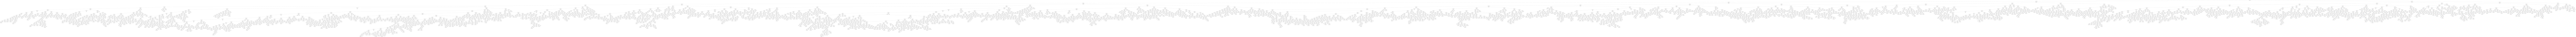

In [45]:

##Matriz da confusão
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_teste, y_pred_cm),
    columns=['Previsão da t1_home ganhar ', 'Previsão da  t1_home não ganhar'],
    index=['Realidade de ganhar', 'Realidade de não ganhar']
)


model = DecisionTreeClassifier()
model.fit(x_train, y_train)

export_graphviz(model, out_file='tree.dot', feature_names=x.columns)
from subprocess import call

call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

from IPython.display import Image
Image(filename = 'tree.png')


In [46]:
#better then pickle
import joblib

filename = 'modelo_final.sav'
joblib.dump(model, open(filename, 'wb'))

In [47]:
# load the model from disk
loaded_model = joblib.load(open(filename, 'rb'))
result = loaded_model.score(x_teste, y_teste)
print(result)

# novo registo a prever
dNew = pd.read_csv('../files/t1_win_Sample.csv')
dNew = dNew.drop('t1_fl_match_win', axis=1)   #Remover o campo vitoria
dNew.head(2)     #Mostra as primeiras n linhas do conjunto de dados   Display the first n rows of the dataset



0.5435246087548197


,t1_all_total5_fl_match_win,t1_all_total5_fl_match_draw,t1_all_total5_fl_match_lost,t1_all_total10_fl_match_win,t1_all_total10_fl_match_draw,t1_all_total10_fl_match_lost,t2_all_total5_fl_match_win,t2_all_total5_fl_match_draw,t2_all_total5_fl_match_lost,t2_all_total10_fl_match_win,...,t2_away_total5_fl_match_lost,t2_away_total10_fl_match_win,t2_away_total10_fl_match_draw,t2_away_total10_fl_match_lost,t1_h2h_total5_fl_match_win,t1_h2h_total5_fl_match_draw,t1_h2h_total5_fl_match_lost,t1_h2h_total10_fl_match_win,t1_h2h_total10_fl_match_draw,t1_h2h_total10_fl_match_lost
0,3,0,2,6,1,3,0,4,1,2,...,0,2,4,0,0,0,0,0,0,0


In [48]:
#Fazer uma previsão com o novo registo
yNew = pd.Series(loaded_model.predict(dNew))
if yNew[0] == 0:
  print("Equipa da casa perde")
else:
  print("Equipa da casa ganha")

Equipa da casa perde
